In [2]:
# Imports

import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pysam
from pysam import VariantFile
from datetime import datetime, date, timedelta
from collections import Counter
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Display paramaters

context = config.context # talk or paper

if context == 'talk':
    sns.set(style="darkgrid", context="talk", rc={"lines.linewidth": 2, "legend.fontsize":25})
    plt.style.use("dark_background")
    plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5,'font.size': 30})
    sns.set_palette("deep")
else:
    sns.set(context="paper", font_scale=4, rc={"lines.linewidth": 2, "legend.fontsize":25})
    plt.rcParams.update({'font.size': 35})
    sns.set_palette("deep")

lc = 'w' if context == 'talk' else 'k'

# For one patient

In [31]:
# CRC deep WGS patients
# MSS: 986, 809, 1014, 519, 1279
# MS status not done: 512, 1531

patient = 437 #, 1505, 330, 437
#patient = 1014

## Tumor burden

In [32]:
# tumor burden
tf_file_1 = pd.read_csv('../data/tumor_burden/tumor_burden_ichorcna_batch1.txt', header=None)
tf_file_1['patient'] = tf_file_1[0].str.split('-').str[1].str.split('_').str[0]
tf_file_1['date'] = tf_file_1[0].str.split('_').str[1]
tf_file_1['patient_date'] = tf_file_1['patient']  + '_' + tf_file_1['date'] 
tf_file_1.set_index('patient_date', inplace=True)
tf_file_1.drop(0, axis=1, inplace=True)
tf_file_1.rename(columns={1: 'tumor_burden'}, inplace=True)

tf_file_2 = pd.read_csv('../data/tumor_burden/tumor_burden_ichorcna_batch2.txt', header=None)
tf_file_2['patient'] = tf_file_2[0].str.split('_').str[0]
tf_file_2['date'] = tf_file_2[0].str.split('_').str[1]
tf_file_2['patient_date'] = tf_file_2['patient'] + '_' + tf_file_2['date'] 
tf_file_2.set_index('patient_date', inplace=True)
tf_file_2.drop(0, axis=1, inplace=True)
tf_file_2.rename(columns={1: 'tumor_burden'}, inplace=True)

tf_file_3 = pd.read_csv('../data/tumor_burden/tumor_burden_ichorcna_deepWGS.txt', header=None)
tf_file_3['patient'] = tf_file_3[0].str.split('_').str[0]
tf_file_3['date'] = tf_file_3[0].str.split('_').str[1]
tf_file_3['patient_date'] = tf_file_3['patient']  + '_' + tf_file_3['date'] 
tf_file_3.set_index('patient_date', inplace=True)
tf_file_3.drop(0, axis=1, inplace=True)
tf_file_3.rename(columns={1: 'tumor_burden'}, inplace=True)

tf_file = pd.concat([tf_file_1, tf_file_2, tf_file_3])
tf_file['patient'] = tf_file['patient'].astype(int)
tf_file['date'] = pd.to_datetime(tf_file['date'], format='%d%m%y')
tf_file.reset_index(inplace=True)
tf_file.drop('patient_date', axis=1, inplace=True)

tumorburden_dates = tf_file[tf_file['patient'] == patient]['date'].sort_values().astype(str).unique()
print(tumorburden_dates)
print(tf_file.shape)

#tf_file['patient'].unique()
print(tf_file_1.shape[0], tf_file_2.shape[0], tf_file_3.shape[0], tf_file_1.shape[0] + tf_file_2.shape[0] + tf_file_3.shape[0], tf_file.shape[0])
print(65 + 192 + 10)

print(tf_file[tf_file['patient'] == patient].shape[0])
tf_file[tf_file['patient'] == patient]

['2016-04-07' '2016-08-26' '2016-12-15' '2017-01-19' '2017-02-09']
(261, 3)
57 192 12 261 261
267
5


,tumor_burden,patient,date
176,0.1776,437,2016-04-07
177,0.0000,437,2017-02-09
178,0.0000,437,2016-12-15
179,0.0000,437,2017-01-19
180,0.0000,437,2016-08-26


## Treatment

In [33]:
treatment_file = pd.read_csv('../data/treatment/patient_treatment_total_std_201109.txt', sep='\t')
treatment_file['patient'] = treatment_file['patient'].astype(int)
treatment_file['date'] = pd.to_datetime(treatment_file['date'], format='%Y-%m-%d')
treatment_file.rename(columns={'value':'treatment'}, inplace=True)
treatment_file = treatment_file[['patient', 'date', 'treatment']]
treatment_file[treatment_file['patient'] == patient]['date'].astype(str).unique()

array(['2013-10-28', '2013-11-20', '2013-12-04', '2013-12-11',
       '2013-12-18', '2013-12-26', '2014-01-02', '2014-01-09',
       '2014-01-16', '2014-01-23', '2014-01-29', '2014-02-25',
       '2014-03-04', '2014-04-22', '2014-06-12', '2014-06-30',
       '2014-07-02', '2014-07-22', '2014-07-24', '2014-08-05',
       '2014-08-25', '2014-09-09', '2015-01-21', '2015-01-22',
       '2015-02-26', '2015-03-26', '2015-04-23', '2015-05-29',
       '2015-06-25', '2015-07-23', '2015-08-13', '2015-09-03',
       '2015-09-26', '2015-10-15', '2015-11-06', '2015-11-26',
       '2015-12-23', '2016-04-25', '2016-04-27', '2016-05-06',
       '2016-05-09', '2016-05-11', '2016-05-23', '2016-05-25',
       '2016-06-02', '2016-06-06', '2016-06-08', '2016-06-20',
       '2016-07-05', '2016-07-19', '2016-08-01', '2016-08-15',
       '2016-08-30', '2016-09-13', '2016-09-26', '2016-10-10',
       '2016-10-24', '2016-11-07', '2016-11-21', '2016-12-05',
       '2016-12-06', '2016-12-19', '2017-01-09', '2017-

## Plot patient timeline

In [34]:
treatment_patient = treatment_file[treatment_file['patient'] == patient].sort_values('date')
treatment_patient['date'] = treatment_patient['date'].astype(str)
tf_patient = tf_file[tf_file['patient'] == patient].sort_values('date')
tf_patient['date'] = tf_patient['date'].astype(str)
df_patient = pd.concat([treatment_patient, tf_patient])
df_patient = df_patient.sort_values('date')

In [35]:
print([str(a) for a in tf_patient['date'].unique() if a not in df_patient['date'].unique()])
print([str(b) for b in df_patient['date'].unique() if b not in tf_patient['date'].unique()])
alldates = sorted(list(set(list(df_patient['date'].values) + list(tf_patient['date'].values))))
print(len(alldates))

[]
['2013-10-28', '2013-11-20', '2013-12-04', '2013-12-11', '2013-12-18', '2013-12-26', '2014-01-02', '2014-01-09', '2014-01-16', '2014-01-23', '2014-01-29', '2014-02-25', '2014-03-04', '2014-04-22', '2014-06-12', '2014-06-30', '2014-07-02', '2014-07-22', '2014-07-24', '2014-08-05', '2014-08-25', '2014-09-09', '2015-01-21', '2015-01-22', '2015-02-26', '2015-03-26', '2015-04-23', '2015-05-29', '2015-06-25', '2015-07-23', '2015-08-13', '2015-09-03', '2015-09-26', '2015-10-15', '2015-11-06', '2015-11-26', '2015-12-23', '2016-04-25', '2016-04-27', '2016-05-06', '2016-05-09', '2016-05-11', '2016-05-23', '2016-05-25', '2016-06-02', '2016-06-06', '2016-06-08', '2016-06-20', '2016-07-05', '2016-07-19', '2016-08-01', '2016-08-15', '2016-08-30', '2016-09-13', '2016-09-26', '2016-10-10', '2016-10-24', '2016-11-07', '2016-11-21', '2016-12-05', '2016-12-06', '2016-12-19', '2017-01-09', '2017-01-23', '2017-02-27', '2017-03-14', '2017-03-23', '2017-03-27', '2017-03-28', '2017-04-10', '2017-04-24', '2

In [36]:
daytimes = [(datetime.strptime(alldates[i], '%Y-%m-%d') - datetime.strptime(alldates[0], '%Y-%m-%d')).days
            for i in range(len(alldates))]
print(daytimes)

[0, 23, 37, 44, 51, 59, 66, 73, 80, 87, 93, 120, 127, 176, 227, 245, 247, 267, 269, 281, 301, 316, 450, 451, 486, 514, 542, 578, 605, 633, 654, 675, 698, 717, 739, 759, 786, 892, 910, 912, 921, 924, 926, 938, 940, 948, 952, 954, 966, 981, 995, 1008, 1022, 1033, 1037, 1051, 1064, 1078, 1092, 1106, 1120, 1134, 1135, 1144, 1148, 1169, 1179, 1183, 1200, 1218, 1233, 1242, 1246, 1247, 1260, 1274, 1372, 1386, 1407, 1421, 1436, 1438, 1450, 1463, 1477, 1492, 1493, 1505, 1521, 1534, 1535, 1554, 1555, 1582, 1583, 1597, 1611, 1612, 1624, 1638, 1662, 1666, 1680, 1690, 1694, 1697, 1708, 1730, 1732, 1743, 1758, 1771, 1772, 1841, 1855, 1869, 1883, 1897, 1911, 1932, 1933, 1946, 2010, 2024, 2038, 2052, 2066, 2081, 2094, 2107, 2178, 2193, 2206, 2219, 2233, 2247]


<Figure size 432x288 with 0 Axes>

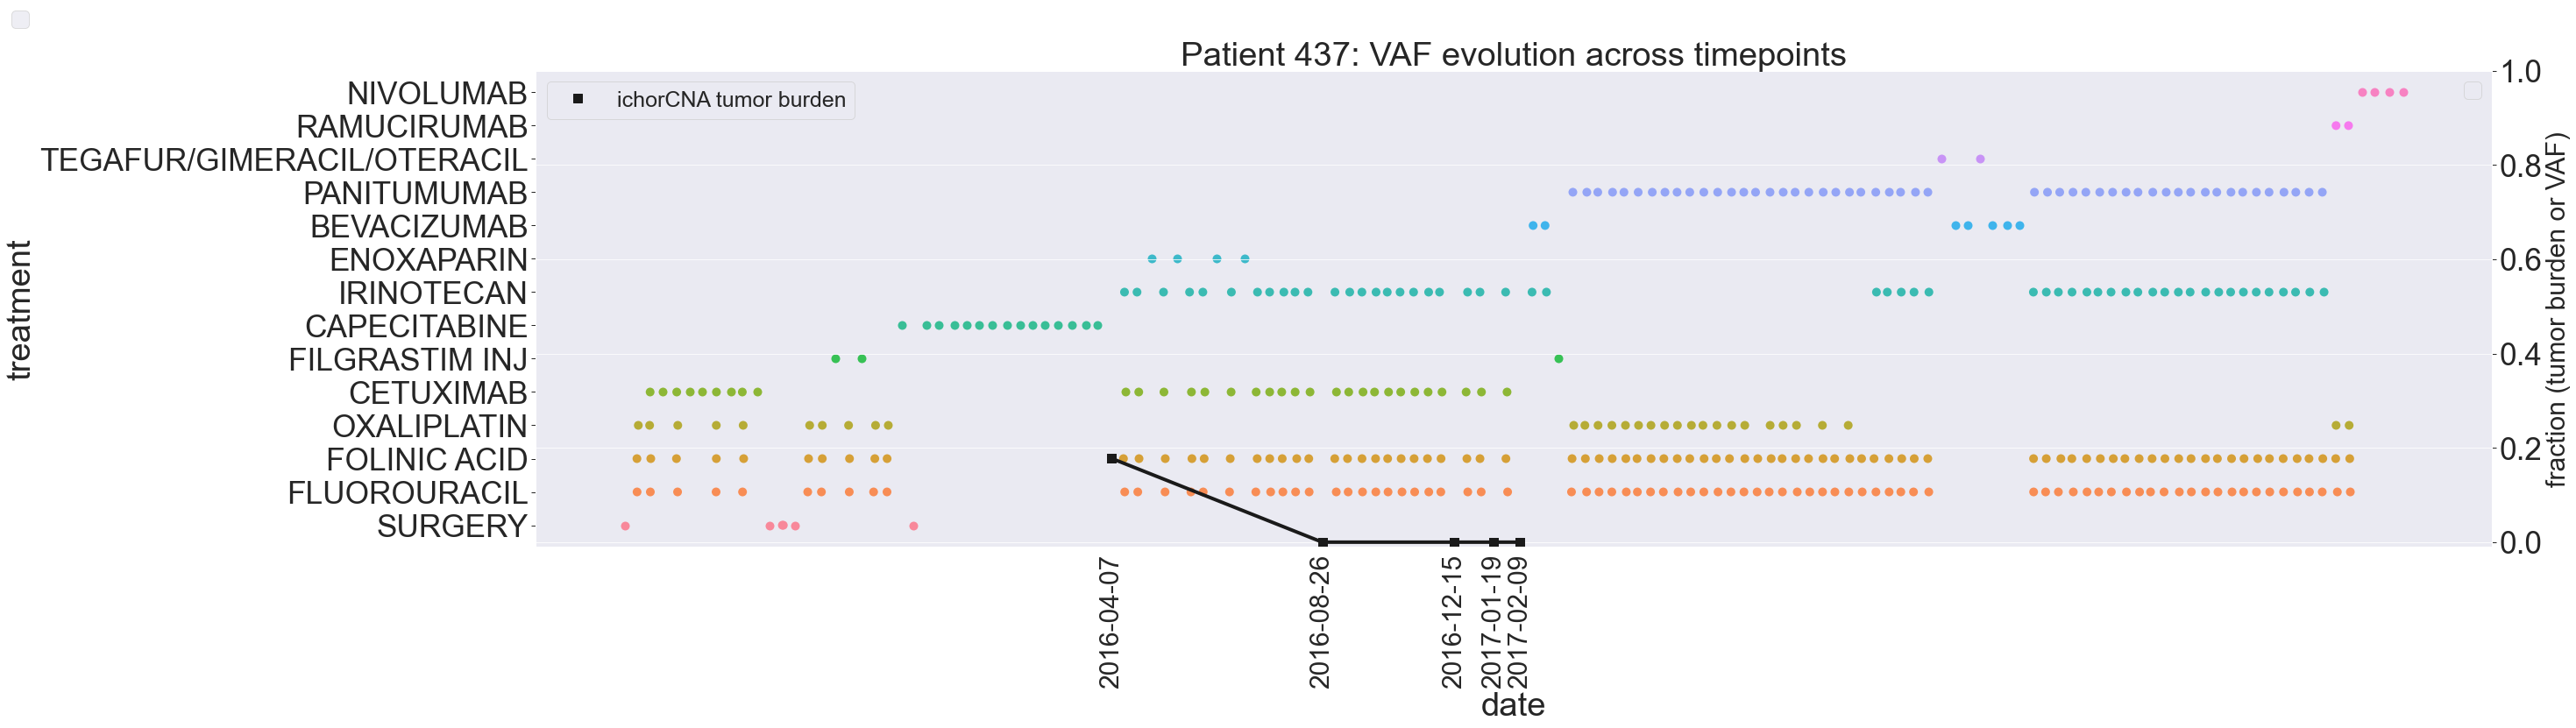

In [37]:
plt.figure()

fig, ax2 = plt.subplots(figsize=(40,10))

# make a plot with different y-axis using second axis object
sns.stripplot(y='treatment', x='date', hue='treatment', data=df_patient, s=10, ax=ax2)
ax2.grid(False)
plt.legend((), ())
        
# twin object for two different y-axis on the sample plot
ax=ax2.twinx()
ele0 = ax.plot(df_patient['date'], df_patient['tumor_burden'], lc+'.', marker='s', markersize=10, label='ichorCNA tumor burden')

ax.plot(df_patient['date'][~df_patient['tumor_burden'].isna()], df_patient['tumor_burden'][~df_patient['tumor_burden'].isna()], lc+'-', linewidth=4)
ax.plot(df_patient['date'][~df_patient['tumor_burden'].isna()], df_patient['tumor_burden'][~df_patient['tumor_burden'].isna()], lc+'.', marker='s', markersize=10)
ax.set_ylabel('fraction (tumor burden or VAF)', fontsize=30)
ax.set_ylim(-0.01, 1)

fig.legend([ele0], ['ichorCNA tumor burden'], loc='upper left')
ax.legend(loc='upper left')

labels = [ad if ad in tumorburden_dates else '' for ad in alldates]
ax2.set_xticklabels(labels, rotation=90, fontsize=30)
ax.set_xticklabels(labels, rotation=90, fontsize=30)

plt.title('Patient {}: VAF evolution across timepoints'.format(patient))

if not os.path.exists('../figures/low_tb_timepoints/oncosg_timeline_patient'+str(patient)+'.png'):
    plt.savefig('../figures/low_tb_timepoints/oncosg_timeline_patient'+str(patient)+'.png', bbox_inches='tight')
    
plt.show()

In [38]:
# check tf dates

date_lowtftimepoints = list(tf_patient[tf_patient['tumor_burden'] == 0]['date'].unique())
if date_lowtftimepoints == []:
    print('no zero ichorCNA estimate tumor burden')
    print('min tumor burden is {}'.format(min(tf_patient['tumor_burden'])))
    if min(tf_patient['tumor_burden']) < 0.1:
        date_lowtftimepoints = list(tf_patient[tf_patient['tumor_burden'] == min(tf_patient['tumor_burden'])]['date'].unique())
print(date_lowtftimepoints)
tf_patient[['date', 'tumor_burden']].T

['2016-08-26', '2016-12-15', '2017-01-19', '2017-02-09']


,176,180,178,179,177
date,2016-04-07,2016-08-26,2016-12-15,2017-01-19,2017-02-09
tumor_burden,0.1776,0,0,0,0


In [39]:
date_lowtftimepoints

['2016-08-26', '2016-12-15', '2017-01-19', '2017-02-09']

## Mutation calls

In [40]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    res = pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})
    return res

In [41]:
# 226 - panel
mutation_df = pd.read_excel('../data/variant_calls/226 PANEL VARIANTS CLASSIFICSATION EXCEL/CCG_226_'+str(patient)+'_reGeno.VEP.readable_tiers.xls')
print(mutation_df.columns)

col = ['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'TIERS']
targeted_lowtf = []
for it in list(date_lowtftimepoints):
    aux1 = 'CCG_226_'+str(patient)+'.'+ it.split('-')[-1]+it.split('-')[1]+it.split('-')[0][-2:]+'.P'
    aux2 = 'CCG_226_'+str(patient)+'.'+ it.split('-')[-1]+it.split('-')[1]+it.split('-')[0][-2:]
    if sum(mutation_df.columns.str.contains(aux1)) == 1 or sum(mutation_df.columns.str.contains(aux2)) == 1:
        if sum(mutation_df.columns.str.contains(aux1)) == 1:
            idx = mutation_df.columns.str.contains(aux1).tolist().index(True)
        elif sum(mutation_df.columns.str.contains(aux2)) == 1:
            idx = mutation_df.columns.str.contains(aux2).tolist().index(True)
        col.append(mutation_df.columns[idx])
        targeted_lowtf.append(str(pd.to_datetime(mutation_df.columns[idx].split('.')[1], format='%d%m%y')).split(' ')[0])
print(col)
mutation_df = mutation_df[col]
mutation_df.insert(loc = 6,
      column = 'helper',
      value = 'hello')
mutation_lowtftimepoints_226 = (mutation_df.set_index(col[:6]+['helper'])
                               .stack()
                               .unstack(-2)
                               .ffill(axis=1)
                               .bfill(axis=1, downcast='infer')
                               .add_prefix('new_')
                               .reset_index()
                               .rename({'level_6': 'date'}, axis=1))

mutation_lowtftimepoints_226['date'] = mutation_lowtftimepoints_226['date'].str.split('.').str[1]
mutation_lowtftimepoints_226['date'] = pd.to_datetime(mutation_lowtftimepoints_226['date'], format='%d%m%y').astype(str)
foo2 = lambda x: pd.Series(float(x.split(' / ')[0])/float(x.split(' / ')[1].split(' = ')[0]))
mutation_lowtftimepoints_226['VAF'] = mutation_lowtftimepoints_226['new_hello'].apply(foo2)
mutation_lowtftimepoints_226.drop('new_hello', axis=1, inplace=True)
mutation_lowtftimepoints_226 = mutation_lowtftimepoints_226[mutation_lowtftimepoints_226['TIERS'] == 'Trusted']
print(mutation_lowtftimepoints_226.shape)
print(targeted_lowtf)
mutation_lowtftimepoints_226.head()

Index(['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'Consequence', 'Impact',
       'Biotype', 'ProteinPos', 'AminoAcidChange', 'ExistingVar',
       'PopulationVAF', '437_220414_B', 'CCG_226_437.070416.P',
       'CCG_226_437.090217.P', 'CCG_226_437.190117.P', 'TIERS'],
      dtype='object')
['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'TIERS', 'CCG_226_437.190117.P', 'CCG_226_437.090217.P']
(0, 8)
['2017-01-19', '2017-02-09']


helper,#CHROM,POS,REF,ALT,GENE,TIERS,date,VAF


In [42]:
mutation_df.set_index(col[:6]+['helper']).stack()

#CHROM  POS        REF    ALT         GENE      TIERS     helper                      
chr5    112838115  TTAGA  T           APC       Artifact  hello   CCG_226_437.190117.P      0 / 139 = 0.000
                                                                  CCG_226_437.090217.P      0 / 197 = 0.000
chr11   118902524  G      A           CXCR5     Artifact  hello   CCG_226_437.190117.P      0 / 128 = 0.000
                                                                  CCG_226_437.090217.P      1 / 293 = 0.003
                                      BCL9L     Artifact  hello   CCG_226_437.190117.P      0 / 128 = 0.000
                                                                  CCG_226_437.090217.P      1 / 293 = 0.003
chr17   7674239    A      T           TP53      Artifact  hello   CCG_226_437.190117.P      0 / 198 = 0.000
                                                                  CCG_226_437.090217.P      4 / 318 = 0.013
chr7    152265180  C      T           KMT2C     A

In [44]:
# MCP panel
mutation_df = pd.read_csv('../data/variant_calls/final_readablefile/CCG_MCP_'+str(patient)+'_reGeno.VEP.readable.txt', sep='\t')
print(mutation_df.columns)

col = ['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'TIERS']
if 'TIERS' not in mutation_df.columns:
    mutation_df['TIERS'] = 'Trusted'

for it in list(date_lowtftimepoints):
    aux1 = 'CCG_MCP_'+str(patient)+'.'+ it.split('-')[-1]+it.split('-')[1]+it.split('-')[0][-2:]+'.P'
    if sum(mutation_df.columns.str.contains(aux1)) == 1:
        idx = mutation_df.columns.str.contains(aux1).tolist().index(True)
        print(idx)
    else:
        aux2 = 'CCG_MCP_'+str(patient)+'.'+ it.split('-')[-1]+it.split('-')[1]+it.split('-')[0][-2:]
        if sum(mutation_df.columns.str.contains(aux2)) == 1:
            idx = mutation_df.columns.str.contains(aux2).tolist().index(True)
            print(idx)
        col.append(mutation_df.columns[idx])
print(col)
mutation_df = mutation_df[col]
mutation_df.insert(loc = 6,
      column = 'helper',
      value = 'hello')
mutation_lowtftimepoints_MCP = (mutation_df.set_index(col[:6]+['helper'])
                               .stack()
                               .drop_duplicates()
                               .unstack(-2)
                               .ffill(axis=1)
                               .bfill(axis=1, downcast='infer')
                               .add_prefix('new_')
                               .reset_index()
                               .rename({'level_6': 'date'}, axis=1))

mutation_lowtftimepoints_MCP['date'] = mutation_lowtftimepoints_MCP['date'].str.split('.').str[1]
mutation_lowtftimepoints_MCP['date'] = pd.to_datetime(mutation_lowtftimepoints_MCP['date'], format='%d%m%y').astype(str)
foo2 = lambda x: pd.Series(float(x.split(' / ')[0])/float(x.split(' / ')[1].split(' = ')[0]))
mutation_lowtftimepoints_MCP['VAF'] = mutation_lowtftimepoints_MCP['new_hello'].apply(foo2)
mutation_lowtftimepoints_MCP.drop('new_hello', axis=1, inplace=True)
print(mutation_lowtftimepoints_MCP.shape)
mutation_lowtftimepoints_MCP.head()

Index(['#CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'GENE', 'Consequence', 'Impact',
       'Biotype', 'ProteinPos', 'AminoAcidChange', 'ExistingVar',
       'PopulationVAF', 'CCG_MCP_437.070416.P', 'CCG_MCP_437.090217.P',
       'CCG_MCP_437.190117.P', 'CCG_MCP_437_220414_B'],
      dtype='object')
15
14
['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'TIERS', 'CCG_MCP_437.090217.P', 'CCG_MCP_437.090217.P']
(32, 8)


helper,#CHROM,POS,REF,ALT,GENE,TIERS,date,VAF
0,chr1,11790870,C,T,C1orf167,Trusted,2017-02-09,0.547368
1,chr1,11794419,T,G,C1orf167,Trusted,2017-02-09,0.508772
2,chr1,11796321,G,A,MTHFR,Trusted,2017-02-09,0.555556
3,chr1,47333967,G,C,CMPK1,Trusted,2017-02-09,1.000000
4,chr1,204268288,C,T,PLEKHA6,Trusted,2017-02-09,0.395161


In [46]:
#mutation_lowtftimepoints = mutation_lowtftimepoints_226
mutation_lowtftimepoints = pd.concat([mutation_lowtftimepoints_226, mutation_lowtftimepoints_MCP])
print(mutation_lowtftimepoints.shape)
print(mutation_lowtftimepoints['date'].unique())
mutation_lowtftimepoints[mutation_lowtftimepoints['TIERS'] == 'Trusted']

(32, 8)
['2017-02-09']


helper,#CHROM,POS,REF,ALT,GENE,TIERS,date,VAF
0,chr1,11790870,C,T,C1orf167,Trusted,2017-02-09,0.547368
1,chr1,11794419,T,G,C1orf167,Trusted,2017-02-09,0.508772
2,chr1,11796321,G,A,MTHFR,Trusted,2017-02-09,0.555556
3,chr1,47333967,G,C,CMPK1,Trusted,2017-02-09,1.000000
4,chr1,204268288,C,T,PLEKHA6,Trusted,2017-02-09,0.395161
5,chr10,99784690,A,T,ABCC2,Trusted,2017-02-09,1.000000
6,chr11,55885487,A,G,TRIM51,Trusted,2017-02-09,1.000000
7,chr11,55885688,G,A,TRIM51,Trusted,2017-02-09,1.000000
8,chr11,67585218,A,G,GSTP1,Trusted,2017-02-09,0.530612
9,chr13,95206781,C,A,ABCC4,Trusted,2017-02-09,0.507692


In [47]:
lowtftimepoints_dict = {'date': date_lowtftimepoints,
                        'median VAF': [],
                        '# mutated genes' : [],
                        'median VAF within mutated genes': [],
                        '# mutated genes TRUSTED': [],
                        'median VAF within mutated genes TRUSTED': []
                       }

for date in date_lowtftimepoints:
    nmut = mutation_lowtftimepoints[(mutation_lowtftimepoints['date'] == date) & (mutation_lowtftimepoints['VAF'] != 0)].shape[0]
    nmuttrust = mutation_lowtftimepoints[(mutation_lowtftimepoints['date'] == date)  & (mutation_lowtftimepoints['VAF'] != 0)  & (mutation_lowtftimepoints['TIERS'] == 'Trusted')].shape[0]
    medianvaf = np.median(mutation_lowtftimepoints[(mutation_lowtftimepoints['date'] == date)]['VAF'].values)
    medianvafn = np.median(mutation_lowtftimepoints[(mutation_lowtftimepoints['date'] == date) & (mutation_lowtftimepoints['VAF'] != 0)]['VAF'].values)
    medianvafntrust = np.median(mutation_lowtftimepoints[(mutation_lowtftimepoints['date'] == date) & (mutation_lowtftimepoints['VAF'] != 0) & (mutation_lowtftimepoints['TIERS'] == 'Trusted')]['VAF'].values)
    lowtftimepoints_dict['# mutated genes'].append(nmut)
    lowtftimepoints_dict['# mutated genes TRUSTED'].append(nmuttrust)
    lowtftimepoints_dict['median VAF'].append(medianvaf)
    lowtftimepoints_dict['median VAF within mutated genes'].append(medianvafn)
    lowtftimepoints_dict['median VAF within mutated genes TRUSTED'].append(medianvafntrust)
    

lowtftimepoints_pd = pd.DataFrame.from_dict(lowtftimepoints_dict)
lowtftimepoints_pd.set_index('date', inplace=True)
lowtftimepoints_pd.loc[targeted_lowtf]

,median VAF,# mutated genes,median VAF within mutated genes,# mutated genes TRUSTED,median VAF within mutated genes TRUSTED
date,,,,,
2017-01-19,NaN,0,NaN,0,NaN
2017-02-09,0.525552,32,0.525552,32,0.525552


In [48]:
targeted_lowtf

['2017-01-19', '2017-02-09']

## Plot mutations timeline

In [49]:
mutation_df_MCP = pd.read_csv('../data/variant_calls/final_readablefile/CCG_MCP_'+str(patient)+'_reGeno.VEP.readable.txt', sep='\t')
print(mutation_df_MCP.columns)


col = ['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'TIERS']
if 'TIERS' not in mutation_df_MCP.columns:
    mutation_df_MCP['TIERS'] = 'Trusted'

for c in list(mutation_df_MCP.columns[6:]):
    if c.startswith('CCG_MCP_'+str(patient)):
        col.append(c)
print(col)
mutation_df_MCP = mutation_df_MCP[col]
mutation_df_MCP.insert(loc = 6,
      column = 'helper',
      value = 'hello')
mutations_acrosstime_MCP = (mutation_df_MCP.set_index(col[:6]+['helper'])
                               .stack()
                               .unstack(-2)
                               .ffill(axis=1)
                               .bfill(axis=1, downcast='infer')
                               .add_prefix('new_')
                               .reset_index()
                               .rename({'level_6': 'date'}, axis=1))
mutations_acrosstime_MCP['date'] = mutations_acrosstime_MCP['date'].str.split('.').str[1]
mutations_acrosstime_MCP['date'] = pd.to_datetime(mutations_acrosstime_MCP['date'], format='%d%m%y').astype(str)
foo2 = lambda x: pd.Series(float(x.split(' / ')[0])/float(x.split(' / ')[1].split(' = ')[0]))
mutations_acrosstime_MCP['VAF'] = mutations_acrosstime_MCP['new_hello'].apply(foo2)
mutations_acrosstime_MCP.drop('new_hello', axis=1, inplace=True)
mutations_acrosstime_MCP.rename(columns={'TIER': 'TIERS'}, inplace=True)
mutations_acrosstime_MCP = mutations_acrosstime_MCP.pivot_table(values='VAF', index='GENE', columns='date', aggfunc='first')
mutations_acrosstime_MCP = mutations_acrosstime_MCP.T
mutations_acrosstime_MCP.head()

Index(['#CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'GENE', 'Consequence', 'Impact',
       'Biotype', 'ProteinPos', 'AminoAcidChange', 'ExistingVar',
       'PopulationVAF', 'CCG_MCP_437.070416.P', 'CCG_MCP_437.090217.P',
       'CCG_MCP_437.190117.P', 'CCG_MCP_437_220414_B'],
      dtype='object')
['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'TIERS', 'CCG_MCP_437.070416.P', 'CCG_MCP_437.090217.P', 'CCG_MCP_437.190117.P', 'CCG_MCP_437_220414_B']


GENE,ABCC2,ABCC4,ABCG2,AJM1,AXIN2,C1orf167,CASP8,CMPK1,CRTC1,FHOD3,...,MTHFR,NEFH,PLEKHA6,RNU6-890P,SALL4,TGIF1,TRIM51,UCK1,UGT1A3,UMPS
date,,,,,,,,,,,,,,,,,,,,,
2016-04-07,1.000000,0.424171,0.601770,0.503125,0.355705,0.414226,0.385965,1.0,0.436293,0.532338,...,0.574713,0.382353,0.333333,0.503741,0.485646,0.450262,1.000000,1.0,0.396761,0.514360
2017-01-19,1.000000,0.544643,0.350746,0.566038,0.547297,0.535714,0.523364,1.0,0.520325,0.413408,...,0.484848,0.445783,0.450000,0.459459,0.430303,0.534161,1.000000,1.0,0.439252,0.452703
2017-02-09,1.000000,0.507692,0.551724,0.456954,0.424242,0.547368,0.637500,1.0,0.374150,0.462687,...,0.555556,0.414414,0.395161,0.512821,0.384106,0.488550,1.000000,1.0,0.631579,0.575949
NaT,0.964286,0.515152,0.488372,0.517857,0.400000,0.655172,0.477273,1.0,0.450000,0.500000,...,0.590909,0.285714,0.423077,0.475410,0.288889,0.537037,0.977778,1.0,0.448276,0.370968


In [50]:
mutation_df_226 = pd.read_excel('../data/variant_calls/226 PANEL VARIANTS CLASSIFICSATION EXCEL/CCG_226_'+str(patient)+'_reGeno.VEP.readable_tiers.xls')
print(mutation_df_226.columns)


col = ['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'TIERS']
mutation_df_226 = mutation_df_226[mutation_df_226["TIERS"] == 'Trusted']
for c in list(mutation_df_226.columns[6:]):
    if c.startswith('CCG_226_'+str(patient)):
        col.append(c)
print(col)
mutation_df_226 = mutation_df_226[col]
mutation_df_226.insert(loc = 6,
      column = 'helper',
      value = 'hello')
mutations_acrosstime_226 = (mutation_df_226.set_index(col[:6]+['helper'])
                               .stack()
                               .unstack(-2)
                               .ffill(axis=1)
                               .bfill(axis=1, downcast='infer')
                               .add_prefix('new_')
                               .reset_index()
                               .rename({'level_6': 'date'}, axis=1))
mutations_acrosstime_226['date'] = mutations_acrosstime_226['date'].str.split('.').str[1]
mutations_acrosstime_226['date'] = pd.to_datetime(mutations_acrosstime_226['date'], format='%d%m%y').astype(str)
foo2 = lambda x: pd.Series(float(x.split(' / ')[0])/float(x.split(' / ')[1].split(' = ')[0]))
mutations_acrosstime_226['VAF'] = mutations_acrosstime_226['new_hello'].apply(foo2)
mutations_acrosstime_226.drop('new_hello', axis=1, inplace=True)
mutations_acrosstime_226 = mutations_acrosstime_226.pivot_table(values='VAF', index='GENE', columns='date', aggfunc='first')
mutations_acrosstime_226 = mutations_acrosstime_226.T
mutations_acrosstime_226.head()

Index(['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'Consequence', 'Impact',
       'Biotype', 'ProteinPos', 'AminoAcidChange', 'ExistingVar',
       'PopulationVAF', '437_220414_B', 'CCG_226_437.070416.P',
       'CCG_226_437.090217.P', 'CCG_226_437.190117.P', 'TIERS'],
      dtype='object')
['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'TIERS', 'CCG_226_437.070416.P', 'CCG_226_437.090217.P', 'CCG_226_437.190117.P']


KeyError: 'new_hello'

In [112]:
#mutations_acrosstime = pd.concat([mutations_acrosstime_226, mutations_acrosstime_MCP], axis=1)
mutations_acrosstime = mutations_acrosstime_226
print(mutations_acrosstime.shape)
mutations_acrosstime.loc[targeted_lowtf]

(0, 7)


KeyError: "None of [Index(['2017-01-19', '2017-02-09'], dtype='object')] are in the [index]"

NameError: name 'mutations_acrosstime' is not defined

<Figure size 432x288 with 0 Axes>

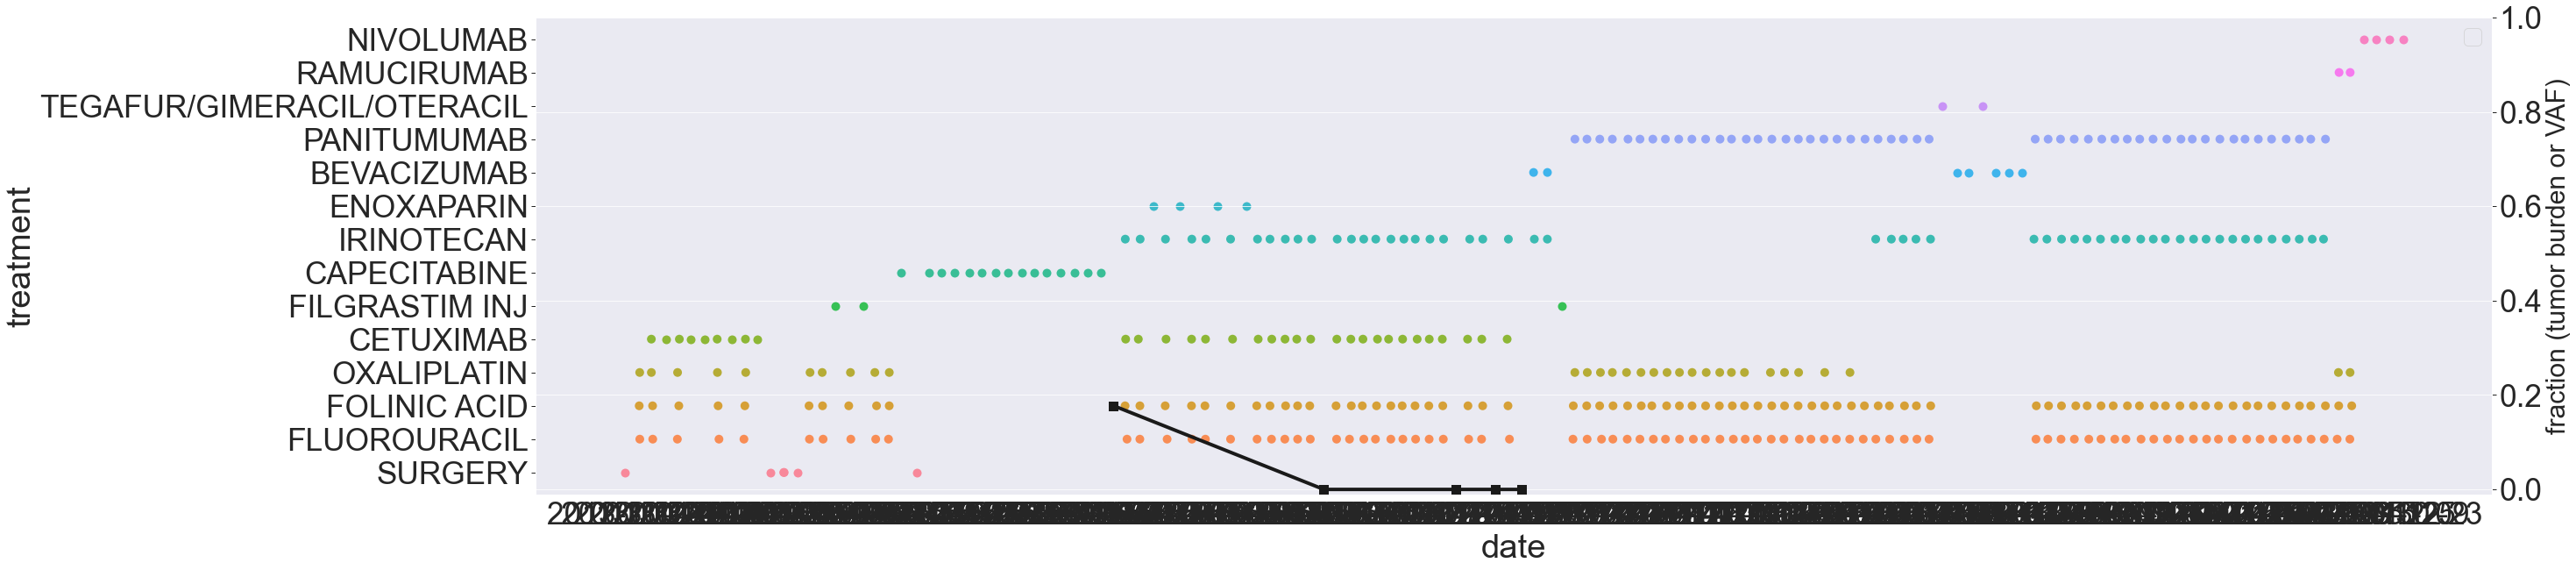

In [51]:
plt.figure()

fig, ax2 = plt.subplots(figsize=(40,10))

# make a plot with different y-axis using second axis object
sns.stripplot(y='treatment', x='date', hue='treatment', data=df_patient, s=10, ax=ax2)
labels = ax2.axes.get_xticklabels()
ax2.grid(False)
plt.legend((), ())
        
# twin object for two different y-axis on the sample plot
ax=ax2.twinx()
ele0 = ax.plot(df_patient['date'], df_patient['tumor_burden'], lc+'.', marker='s', markersize=10, label='ichorCNA tumor burden')

ax.plot(df_patient['date'][~df_patient['tumor_burden'].isna()], df_patient['tumor_burden'][~df_patient['tumor_burden'].isna()], lc+'-', linewidth=4)
ax.plot(df_patient['date'][~df_patient['tumor_burden'].isna()], df_patient['tumor_burden'][~df_patient['tumor_burden'].isna()], lc+'.', marker='s', markersize=10)
ax.set_ylabel('fraction (tumor burden or VAF)', fontsize=30)
ax.set_ylim(-0.01, 1)

xacrosstime = [i for i in mutations_acrosstime.index if i in df_patient['date'].values]

eles = [ele0]
collist = ['r', 'b', 'g', 'c', 'm', 'y', 'tab:pink', 'tab:orange', 'tab:olive', 'tab:purple', 'grey']
if mutation_df_226["TIERS"].iloc[0] == 'Trusted':
    lstype = '-' 
elif mutation_df_226["TIERS"].iloc[0] == 'LowEvidence':
    lstype = '--' 

for gi, gene in enumerate(mutations_acrosstime.columns):
    yacrosstime = [m for i,m in enumerate(mutations_acrosstime[gene].values) if mutations_acrosstime.index[i] in df_patient['date'].values]
    elei = ax.plot(xacrosstime, yacrosstime, color=collist[gi%len(collist)], ls=lstype, linewidth=2, label=gene)
    ax.plot(xacrosstime, yacrosstime, color=collist[gi%len(collist)], ls=lstype, marker='D', markersize=10)
    eles.append(elei)


fig.legend(eles, ['ichorCNA tumor burden'] + mutations_acrosstime.columns, loc='upper left')
ax.legend(loc='upper left')

labels = [ad if ad in tumorburden_dates else '' for ad in alldates]
ax2.set_xticklabels(labels, rotation=90, fontsize=30)
ax.set_xticklabels(labels, rotation=90, fontsize=30)

for dltbt in date_lowtftimepoints:
    print(dltbt)
    ax.get_xticklabels()[labels.index(dltbt)].set_color('blue') 
    ax2.get_xticklabels()[labels.index(dltbt)].set_color('blue') 
    
listdeepwgs = list(pd.to_datetime(tf_file_3[tf_file_3['patient'] == str(patient)]['date'], format='%d%m%y').astype(str).values)
for ldw in listdeepwgs:
    ax.get_xticklabels()[labels.index(ldw)].set_color('red') 
    ax2.get_xticklabels()[labels.index(ldw)].set_color('red') 

plt.title('Patient {}: VAF evolution across timepoints'.format(patient))

if not os.path.exists('../figures/low_tb_timepoints/oncosg_timeline_mutations_patient'+str(patient)+'.png'):
    plt.savefig('../figures/low_tb_timepoints/oncosg_timeline_mutations_patient'+str(patient)+'.png', bbox_inches='tight')

plt.show()

# For all patients

In [114]:
patient

437

In [ ]:
listpatients = [int(f.split('_')[2]) for f in os.listdir('../data/variant_calls/226 PANEL VARIANTS CLASSIFICSATION EXCEL/') if f.startswith('CCG')]
print(listpatients)
print(len(listpatients))

In [ ]:
for patient in listpatients:
    print(patient)
    # tumor burden

    tf_file_1 = pd.read_csv('../data/tumor_burden/tumor_burden_ichorcna_batch1.txt', header=None)
    tf_file_1['patient'] = tf_file_1[0].str.split('-').str[1].str.split('_').str[0]
    tf_file_1['date'] = tf_file_1[0].str.split('_').str[1]
    tf_file_1['patient_date'] = tf_file_1['patient']  + '_' + tf_file_1['date'] 
    tf_file_1.set_index('patient_date', inplace=True)
    tf_file_1.drop(0, axis=1, inplace=True)
    tf_file_1.rename(columns={1: 'tumor_burden'}, inplace=True)

    tf_file_2 = pd.read_csv('../data/tumor_burden/tumor_burden_ichorcna_batch2.txt', header=None)
    tf_file_2['patient'] = tf_file_2[0].str.split('_').str[0]
    tf_file_2['date'] = tf_file_2[0].str.split('_').str[1]
    tf_file_2['patient_date'] = tf_file_2['patient'] + '_' + tf_file_2['date'] 
    tf_file_2.set_index('patient_date', inplace=True)
    tf_file_2.drop(0, axis=1, inplace=True)
    tf_file_2.rename(columns={1: 'tumor_burden'}, inplace=True)

    tf_file_3 = pd.read_csv('../data/tumor_burden/tumor_burden_ichorcna_deepWGS.txt', header=None)
    tf_file_3['patient'] = tf_file_3[0].str.split('_').str[0]
    tf_file_3['date'] = tf_file_3[0].str.split('_').str[1]
    tf_file_3['patient_date'] = tf_file_3['patient']  + '_' + tf_file_3['date'] 
    tf_file_3.set_index('patient_date', inplace=True)
    tf_file_3.drop(0, axis=1, inplace=True)
    tf_file_3.rename(columns={1: 'tumor_burden'}, inplace=True)

    tf_file = pd.concat([tf_file_1, tf_file_2, tf_file_3])
    tf_file['patient'] = tf_file['patient'].astype(int)
    tf_file['date'] = pd.to_datetime(tf_file['date'], format='%d%m%y')
    tf_file.reset_index(inplace=True)
    tf_file.drop('patient_date', axis=1, inplace=True)

    tumorburden_dates = tf_file[tf_file['patient'] == patient]['date'].sort_values().astype(str).unique()
    
    treatment_file = pd.read_csv('../data/treatment/patient_treatment_total_std_201109.txt', sep='\t')
    treatment_file['patient'] = treatment_file['patient'].astype(int)
    treatment_file['date'] = pd.to_datetime(treatment_file['date'], format='%Y-%m-%d')
    treatment_file.rename(columns={'value':'treatment'}, inplace=True)
    treatment_file = treatment_file[['patient', 'date', 'treatment']]
    treatment_file[treatment_file['patient'] == patient]['date'].astype(str).unique()
    
    treatment_patient = treatment_file[treatment_file['patient'] == patient].sort_values('date')
    treatment_patient['date'] = treatment_patient['date'].astype(str)
    tf_patient = tf_file[tf_file['patient'] == patient].sort_values('date')
    tf_patient['date'] = tf_patient['date'].astype(str)
    df_patient = pd.concat([treatment_patient, tf_patient])
    df_patient = df_patient.sort_values('date')

    alldates = sorted(list(set(list(df_patient['date'].values) + list(tf_patient['date'].values))))
    
    daytimes = [(datetime.strptime(alldates[i], '%Y-%m-%d') - datetime.strptime(alldates[0], '%Y-%m-%d')).days
                for i in range(len(alldates))]
    
    date_lowtftimepoints = list(tf_patient[tf_patient['tumor_burden'] == 0]['date'].unique())
    if date_lowtftimepoints == []:
        print('no zero ichorCNA estimate tumor burden')
        print('min tumor burden is {}'.format(min(tf_patient['tumor_burden'])))
        if min(tf_patient['tumor_burden']) < 0.1:
            date_lowtftimepoints = list(tf_patient[tf_patient['tumor_burden'] == min(tf_patient['tumor_burden'])]['date'].unique())
    print(date_lowtftimepoints)
    tf_patient[['date', 'tumor_burden']].T

    plt.figure()

    fig, ax2 = plt.subplots(figsize=(40,10))

    # make a plot with different y-axis using second axis object
    sns.stripplot(y='treatment', x='date', hue='treatment', data=df_patient, s=10, ax=ax2)
    ax2.grid(False)
    plt.legend((), ())

    # twin object for two different y-axis on the sample plot
    ax=ax2.twinx()
    ele0 = ax.plot(df_patient['date'], df_patient['tumor_burden'], lc+'.', marker='s', markersize=10, label='ichorCNA tumor burden')

    ax.plot(df_patient['date'][~df_patient['tumor_burden'].isna()], df_patient['tumor_burden'][~df_patient['tumor_burden'].isna()], lc+'-', linewidth=4)
    ax.plot(df_patient['date'][~df_patient['tumor_burden'].isna()], df_patient['tumor_burden'][~df_patient['tumor_burden'].isna()], lc+'.', marker='s', markersize=10)
    ax.set_ylabel('fraction (tumor burden or VAF)', fontsize=30)
    ax.set_ylim(-0.01, 1)

    fig.legend([ele0], ['ichorCNA tumor burden'], loc='upper left')
    ax.legend(loc='upper left')

    labels = [ad if ad in tumorburden_dates else '' for ad in alldates]
    ax2.set_xticklabels(labels, rotation=90, fontsize=30)
    ax.set_xticklabels(labels, rotation=90, fontsize=30)

    plt.title('Patient {}: VAF evolution across timepoints'.format(patient))

    if not os.path.exists('../figures/low_tb_timepoints/oncosg_timeline_patient'+str(patient)+'.png'):
        plt.savefig('../figures/low_tb_timepoints/oncosg_timeline_patient'+str(patient)+'.png', bbox_inches='tight')
        
    # 226 - panel
    mutation_df = pd.read_excel('../data/variant_calls/226 PANEL VARIANTS CLASSIFICSATION EXCEL/CCG_226_'+str(patient)+'_reGeno.VEP.readable_tiers.xls')

    col = ['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'TIERS']

    for it in list(date_lowtftimepoints):
        aux1 = 'CCG_226_'+str(patient)+'.'+ it.split('-')[-1]+it.split('-')[1]+it.split('-')[0][-2:]+'.P'
        aux2 = 'CCG_226_'+str(patient)+'.'+ it.split('-')[-1]+it.split('-')[1]+it.split('-')[0][-2:]
        if sum(mutation_df.columns.str.contains(aux1)) == 1 or sum(mutation_df.columns.str.contains(aux2)) == 1:
            if sum(mutation_df.columns.str.contains(aux1)) == 1:
                idx = mutation_df.columns.str.contains(aux1).tolist().index(True)
            elif sum(mutation_df.columns.str.contains(aux2)) == 1:
                idx = mutation_df.columns.str.contains(aux2).tolist().index(True)
            col.append(mutation_df.columns[idx])
    mutation_df = mutation_df[col]
    mutation_df.insert(loc = 6,
          column = 'helper',
          value = 'hello')
    if mutation_df.shape[1] > 7:
        mutation_lowtftimepoints_226 = (mutation_df.set_index(col[:6]+['helper'])
                                       .stack()
                                       .unstack(-2)
                                       .ffill(axis=1)
                                       .bfill(axis=1, downcast='infer')
                                       .add_prefix('new_')
                                       .reset_index()
                                       .rename({'level_6': 'date'}, axis=1))

        mutation_lowtftimepoints_226['date'] = mutation_lowtftimepoints_226['date'].str.split('.').str[1]
        mutation_lowtftimepoints_226['date'] = pd.to_datetime(mutation_lowtftimepoints_226['date'], format='%d%m%y').astype(str)
        foo2 = lambda x: pd.Series(float(x.split(' / ')[0])/float(x.split(' / ')[1].split(' = ')[0]))
        mutation_lowtftimepoints_226['VAF'] = mutation_lowtftimepoints_226['new_hello'].apply(foo2)
        mutation_lowtftimepoints_226.drop('new_hello', axis=1, inplace=True)
        #mutation_lowtftimepoints_226 = mutation_lowtftimepoints_226[mutation_lowtftimepoints_226['TIERS'] == 'Trusted']

        mutation_lowtftimepoints = mutation_lowtftimepoints_226

        lowtftimepoints_dict = {'date': date_lowtftimepoints,
                            'median VAF': [],
                            '# mutated genes' : [],
                            'median VAF within mutated genes': [],
                            '# mutated genes TRUSTED': [],
                            'median VAF within mutated genes TRUSTED': []
                           }

        for date in date_lowtftimepoints:
            nmut = mutation_lowtftimepoints[(mutation_lowtftimepoints['date'] == date) & (mutation_lowtftimepoints['VAF'] != 0)].shape[0]
            nmuttrust = mutation_lowtftimepoints[(mutation_lowtftimepoints['date'] == date)  & (mutation_lowtftimepoints['VAF'] != 0)  & (mutation_lowtftimepoints['TIERS'] == 'Trusted')].shape[0]
            medianvaf = np.median(mutation_lowtftimepoints[(mutation_lowtftimepoints['date'] == date)]['VAF'].values)
            medianvafn = np.median(mutation_lowtftimepoints[(mutation_lowtftimepoints['date'] == date) & (mutation_lowtftimepoints['VAF'] != 0)]['VAF'].values)
            medianvafntrust = np.median(mutation_lowtftimepoints[(mutation_lowtftimepoints['date'] == date) & (mutation_lowtftimepoints['VAF'] != 0) & (mutation_lowtftimepoints['TIERS'] == 'Trusted')]['VAF'].values)
            lowtftimepoints_dict['# mutated genes'].append(nmut)
            lowtftimepoints_dict['# mutated genes TRUSTED'].append(nmuttrust)
            lowtftimepoints_dict['median VAF'].append(medianvaf)
            lowtftimepoints_dict['median VAF within mutated genes'].append(medianvafn)
            lowtftimepoints_dict['median VAF within mutated genes TRUSTED'].append(medianvafntrust)


        lowtftimepoints_pd = pd.DataFrame.from_dict(lowtftimepoints_dict)
        lowtftimepoints_pd.set_index('date', inplace=True)

        mutation_df_226 = pd.read_excel('../data/variant_calls/226 PANEL VARIANTS CLASSIFICSATION EXCEL/CCG_226_'+str(patient)+'_reGeno.VEP.readable_tiers.xls')


        col = ['#CHROM', 'POS', 'REF', 'ALT', 'GENE', 'TIERS']
        if mutation_df_226[mutation_df_226["TIERS"] == 'Trusted'].shape[0] != 0:
            mutation_df_226 = mutation_df_226[mutation_df_226["TIERS"] == 'Trusted']
        else:
            mutation_df_226 = mutation_df_226[mutation_df_226["TIERS"] == 'LowEvidence']
        print(mutation_df_226.shape)
        if mutation_df_226.shape[0] > 0:

            for c in list(mutation_df_226.columns[6:]):
                if c.startswith('CCG_226_'+str(patient)):
                    col.append(c)
            mutation_df_226 = mutation_df_226[col]
            mutation_df_226.insert(loc = 6,
                  column = 'helper',
                  value = 'hello')
            mutations_acrosstime_226 = (mutation_df_226.set_index(col[:6]+['helper'])
                                           .stack()
                                           .unstack(-2)
                                           .ffill(axis=1)
                                           .bfill(axis=1, downcast='infer')
                                           .add_prefix('new_')
                                           .reset_index()
                                           .rename({'level_6': 'date'}, axis=1))
            mutations_acrosstime_226['date'] = mutations_acrosstime_226['date'].str.split('.').str[1]
            mutations_acrosstime_226['date'] = pd.to_datetime(mutations_acrosstime_226['date'], format='%d%m%y').astype(str)
            foo2 = lambda x: pd.Series(float(x.split(' / ')[0])/float(x.split(' / ')[1].split(' = ')[0]))
            mutations_acrosstime_226['VAF'] = mutations_acrosstime_226['new_hello'].apply(foo2)
            mutations_acrosstime_226.drop('new_hello', axis=1, inplace=True)
            mutations_acrosstime_226 = mutations_acrosstime_226.pivot_table(values='VAF', index='GENE', columns='date', aggfunc='first')
            mutations_acrosstime_226 = mutations_acrosstime_226.T

            mutations_acrosstime = mutations_acrosstime_226


            plt.figure()

            fig, ax2 = plt.subplots(figsize=(40,10))

            # make a plot with different y-axis using second axis object
            sns.stripplot(y='treatment', x='date', hue='treatment', data=df_patient, s=10, ax=ax2)
            labels = ax2.axes.get_xticklabels()
            ax2.grid(False)
            plt.legend((), ())

            # twin object for two different y-axis on the sample plot
            ax=ax2.twinx()
            ele0 = ax.plot(df_patient['date'], df_patient['tumor_burden'], lc+'.', marker='s', markersize=10, label='ichorCNA tumor burden')

            ax.plot(df_patient['date'][~df_patient['tumor_burden'].isna()], df_patient['tumor_burden'][~df_patient['tumor_burden'].isna()], lc+'-', linewidth=4)
            ax.plot(df_patient['date'][~df_patient['tumor_burden'].isna()], df_patient['tumor_burden'][~df_patient['tumor_burden'].isna()], lc+'.', marker='s', markersize=10)
            ax.set_ylabel('fraction (tumor burden or VAF)', fontsize=30)
            ax.set_ylim(-0.01, 1)

            xacrosstime = [i for i in mutations_acrosstime.index if i in df_patient['date'].values]

            eles = [ele0]
            collist = ['r', 'b', 'g', 'c', 'm', 'y', 'tab:pink', 'tab:orange', 'tab:olive', 'tab:purple', 'grey']
            if mutation_df_226["TIERS"].iloc[0] == 'Trusted':
                lstype = '-' 
            elif mutation_df_226["TIERS"].iloc[0] == 'LowEvidence':
                lstype = '--' 

            for gi, gene in enumerate(mutations_acrosstime.columns):
                yacrosstime = [m for i,m in enumerate(mutations_acrosstime[gene].values) if mutations_acrosstime.index[i] in df_patient['date'].values]
                elei = ax.plot(xacrosstime, yacrosstime, color=collist[gi%len(collist)], ls=lstype, linewidth=2, label=gene)
                ax.plot(xacrosstime, yacrosstime, color=collist[gi%len(collist)], ls=lstype, marker='D', markersize=10)
                eles.append(elei)

            fig.legend(eles, ['ichorCNA tumor burden'] + mutations_acrosstime.columns, loc='upper left')
            ax.legend(loc='upper left')

            labels = [ad if ad in tumorburden_dates else '' for ad in alldates]
            ax2.set_xticklabels(labels, rotation=90, fontsize=30)
            ax.set_xticklabels(labels, rotation=90, fontsize=30)

            for dltbt in date_lowtftimepoints:
                ax.get_xticklabels()[labels.index(dltbt)].set_color('blue') 
                ax2.get_xticklabels()[labels.index(dltbt)].set_color('blue') 

            listdeepwgs = list(pd.to_datetime(tf_file_3[tf_file_3['patient'] == str(patient)]['date'], format='%d%m%y').astype(str).values)
            for ldw in listdeepwgs:
                ax.get_xticklabels()[labels.index(ldw)].set_color('red') 
                ax2.get_xticklabels()[labels.index(ldw)].set_color('red') 

            plt.title('Patient {}: VAF evolution across timepoints'.format(patient))

            #if not os.path.exists('../figures/low_tb_timepoints/oncosg_timeline_mutations_patient'+str(patient)+'.png'):
            plt.savefig('../figures/low_tb_timepoints/oncosg_timeline_mutations_patient'+str(patient)+'.png', bbox_inches='tight')